# Evaluation Project 9 - US Covid 

Objective - To develop a ML model to predict deaths and recovery rate due to covid in USA

Approach - Since the target variables i.e No Deaths and no of recoveries is continous in nature hence rigression model will be a suitable fit.

# Importing dataset

In [81]:
us_cov = pd.read_csv('csse_covid_19_daily_reports_us.csv')

<IPython.core.display.Javascript object>

# Loading Dataset

In [82]:
us_cov.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1.0,266.194321,164450.0,1493.0,3.999387,84000001.0,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2.0,54.815493,37045.0,NaN,2.493766,84000002.0,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,124.0,NaN,NaN,16.0,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4.0,204.788838,165435.0,1792.0,5.011405,84000004.0,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5.0,165.782801,96258.0,535.0,2.138717,84000005.0,USA,3189.670370,10.693584


# Performing EDA

In [83]:
us_cov.shape # Checking dataset shape

(1277, 18)

In [84]:
us_cov.columns # Checking all columns name

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [85]:
us_cov.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1.0,266.194321,164450.0,1493.0,3.999387,84000001.0,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2.0,54.815493,37045.0,NaN,2.493766,84000002.0,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,124.0,NaN,NaN,16.0,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4.0,204.788838,165435.0,1792.0,5.011405,84000004.0,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5.0,165.782801,96258.0,535.0,2.138717,84000005.0,USA,3189.670370,10.693584


In [86]:
us_cov.nunique() # No of unique values in the data set

Province_State            59
Country_Region             1
Last_Update               26
Lat                       58
Long_                     58
Confirmed               1105
Deaths                   963
Recovered                768
Active                  1095
FIPS                      60
Incident_Rate           1107
People_Tested           1111
People_Hospitalized      201
Mortality_Rate          1108
UID                       59
ISO3                       6
Testing_Rate            1112
Hospitalization_Rate     212
dtype: int64

In [87]:
us_cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        1277 non-null   object 
 1   Country_Region        1277 non-null   object 
 2   Last_Update           1274 non-null   object 
 3   Lat                   1232 non-null   float64
 4   Long_                 1232 non-null   float64
 5   Confirmed             1277 non-null   int64  
 6   Deaths                1277 non-null   int64  
 7   Recovered             1002 non-null   float64
 8   Active                1277 non-null   float64
 9   FIPS                  1275 non-null   float64
 10  Incident_Rate         1232 non-null   float64
 11  People_Tested         1232 non-null   float64
 12  People_Hospitalized   245 non-null    float64
 13  Mortality_Rate        1254 non-null   float64
 14  UID                   1277 non-null   float64
 15  ISO3                 

In [88]:
us_cov.isnull().sum() # Checking the number of Nan Values

Province_State             0
Country_Region             0
Last_Update                3
Lat                       45
Long_                     45
Confirmed                  0
Deaths                     0
Recovered                275
Active                     0
FIPS                       2
Incident_Rate             45
People_Tested             45
People_Hospitalized     1032
Mortality_Rate            23
UID                        0
ISO3                       0
Testing_Rate              45
Hospitalization_Rate    1032
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

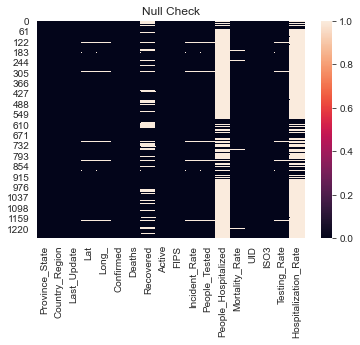

In [89]:
sns.heatmap(us_cov.isnull()) # Visually check Nan values
plt.title('Null Check')
plt.show()

In [90]:
# Both people hospitalized & Hospitalization rate can be seen full of nan values 

In [91]:
us_cov.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,1232.000000,1232.000000,1.277000e+03,1277.000000,1.002000e+03,1.277000e+03,1275.000000,1232.000000,1.232000e+03,245.000000,1254.000000,1.277000e+03,1232.000000,245.000000
mean,36.840089,-85.206614,2.572564e+05,4691.963195,1.279505e+05,1.513972e+05,3143.937255,4327.481772,3.202353e+06,3864.914286,2.470996,7.676767e+07,54743.292994,14.851848
std,10.793773,49.328236,4.209710e+05,7480.001532,2.344891e+05,3.512197e+05,16887.275104,3528.381994,5.616539e+06,11444.676857,1.860840,2.357799e+07,48706.212516,5.447681
min,-14.271000,-170.132200,0.000000e+00,0.000000,0.000000e+00,-3.298800e+04,1.000000,0.000000,3.000000e+00,3.000000,0.000000,1.600000e+01,5.391708,4.676754
25%,34.594600,-101.165775,7.952000e+03,254.000000,3.773750e+03,3.427000e+03,18.000000,321.672794,1.195785e+05,282.000000,1.335932,8.400001e+07,3597.738097,9.943583
50%,39.061850,-87.944200,8.794900e+04,1558.000000,2.665450e+04,2.765500e+04,32.000000,4775.997239,1.139751e+06,1139.000000,1.696038,8.400003e+07,52772.051034,14.329953
75%,42.361650,-76.970625,3.414310e+05,5664.000000,1.672630e+05,1.499090e+05,48.000000,7370.974361,3.992940e+06,2986.000000,3.209207,8.400004e+07,85271.894339,18.411936
max,61.370700,145.673900,3.368281e+06,44148.000000,2.015866e+06,3.325797e+06,99999.000000,12851.447782,4.306723e+07,76410.000000,18.181818,8.410000e+07,242440.773259,29.540020


In [92]:
us_cov.skew()

Lat                    -2.155992
Long_                   3.418699
Confirmed               3.397259
Deaths                  2.644130
Recovered               3.854036
Active                  4.920703
FIPS                    5.269720
Incident_Rate           0.161666
People_Tested           3.589249
People_Hospitalized     5.494797
Mortality_Rate          2.230203
UID                    -2.953612
Testing_Rate            0.768147
Hospitalization_Rate    0.513392
dtype: float64

# Visualization

Univariate Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

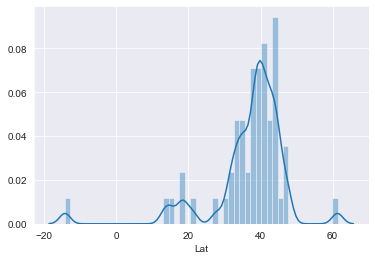

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

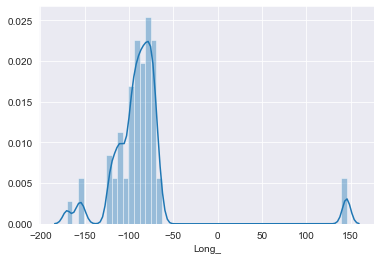

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

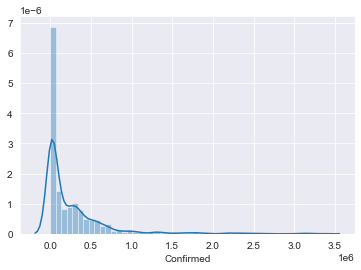

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

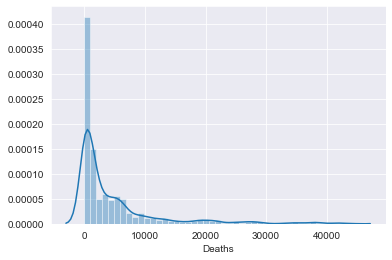

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

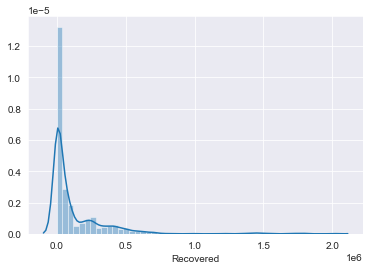

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

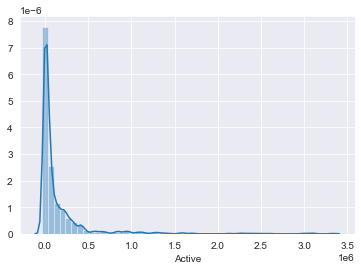

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

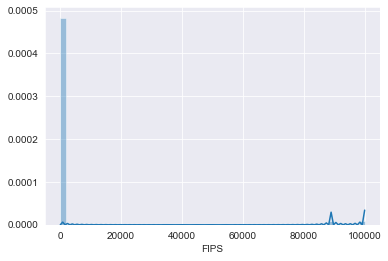

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

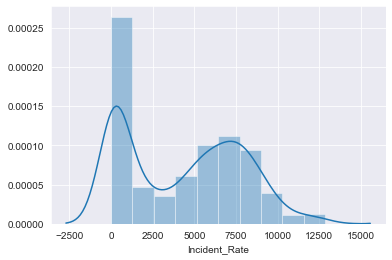

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

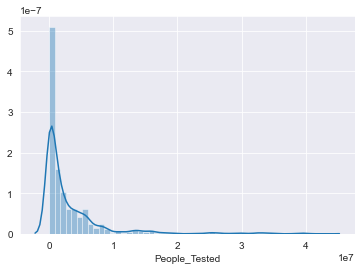

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

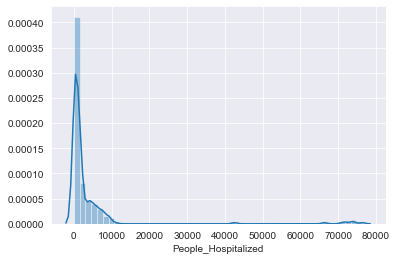

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

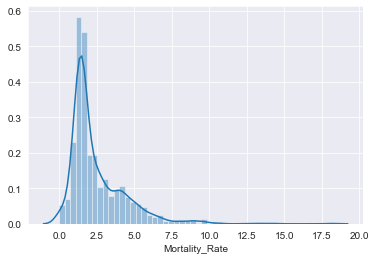

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

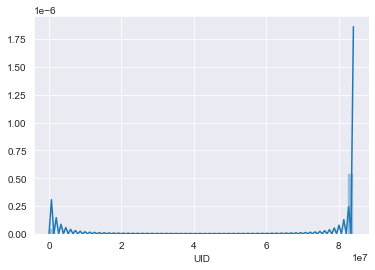

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

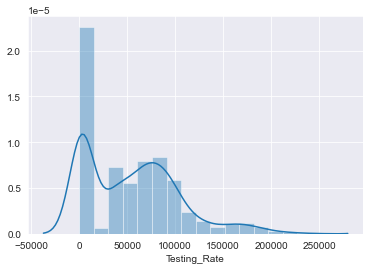

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

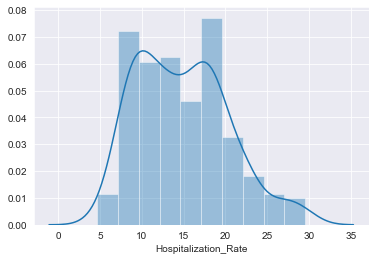

In [55]:
for i in us_cov.describe().columns:
    sns.distplot(us_cov[i])
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

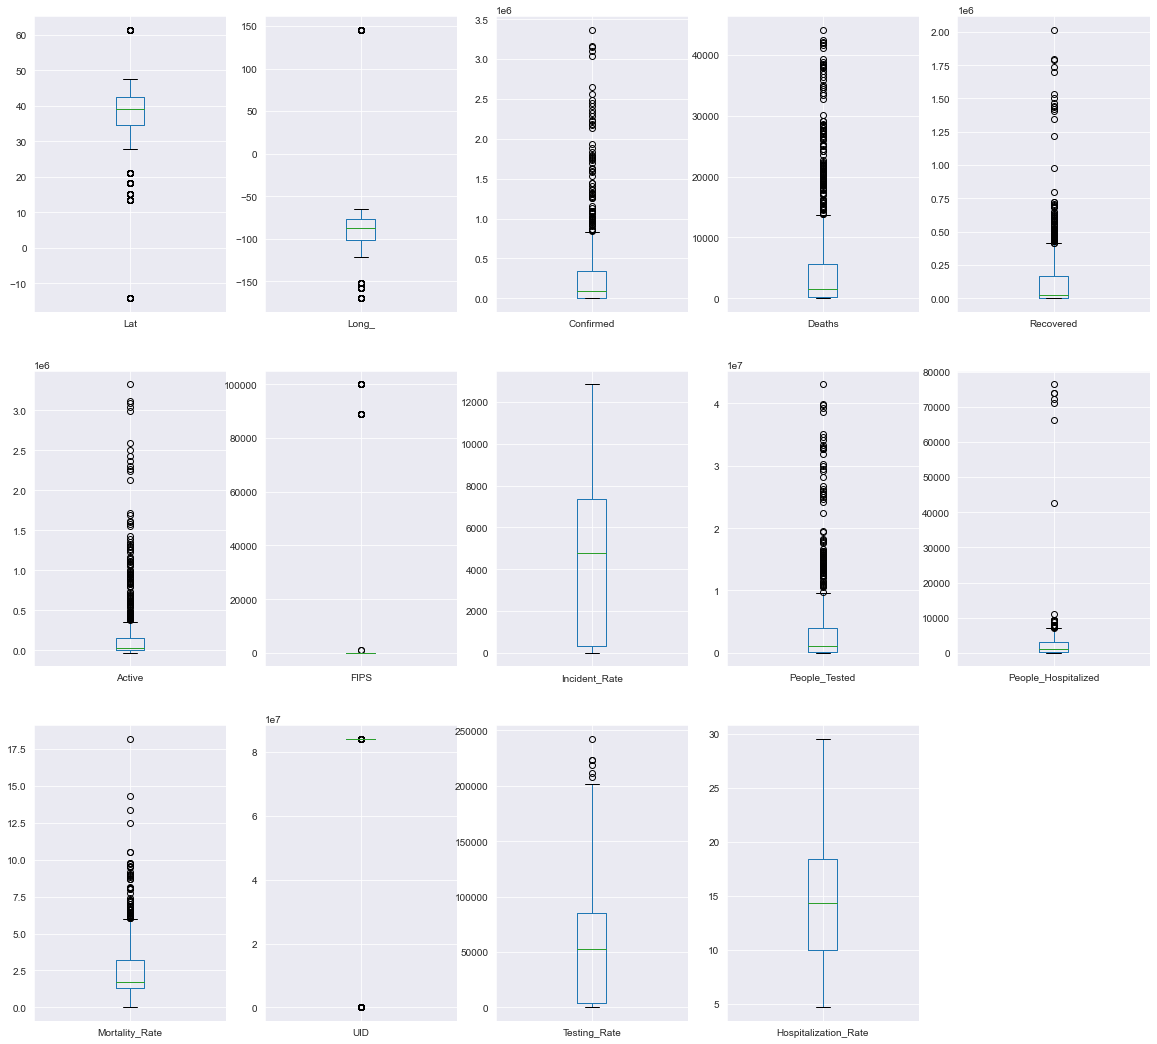

In [56]:
# Outlier detection
us_cov.plot( kind = 'box', subplots = True, layout =(4,5), figsize=(20,25))
sns.set_style('darkgrid')
plt.show()

In [57]:
# Function for analysis categorical variables
def cat_summary(dataframe, x = None, y =None, hue= None, palette ='Set1',verbose = True):# For checcking categorical variably summary
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode :',series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())
        
        
    sns.countplot(x=x,y=y, hue=hue,data = dataframe, palette = palette)
    plt.show()

count     1277
unique      59
top       Guam
freq        22
Name: Province_State, dtype: object
mode : 0                      Alabama
1                       Alaska
2               American Samoa
3                      Arizona
4                     Arkansas
5                   California
6                     Colorado
7                  Connecticut
8                     Delaware
9             Diamond Princess
10        District of Columbia
11                     Florida
12                     Georgia
13              Grand Princess
14                        Guam
15                      Hawaii
16                       Idaho
17                    Illinois
18                     Indiana
19                        Iowa
20                      Kansas
21                    Kentucky
22                   Louisiana
23                       Maine
24                    Maryland
25               Massachusetts
26                    Michigan
27                   Minnesota
28                 Mississipp

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

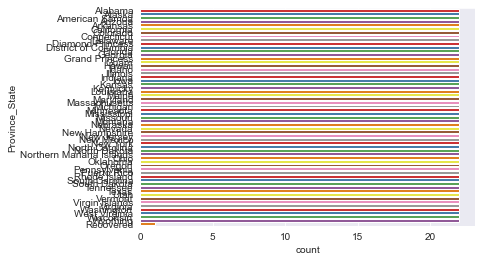

In [58]:
cat_summary(us_cov, y= 'Province_State')

count     1277
unique       6
top        USA
freq      1167
Name: ISO3, dtype: object
mode : 0    USA
dtype: object
USA    1167
VIR      22
GUM      22
ASM      22
MNP      22
PRI      22
Name: ISO3, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

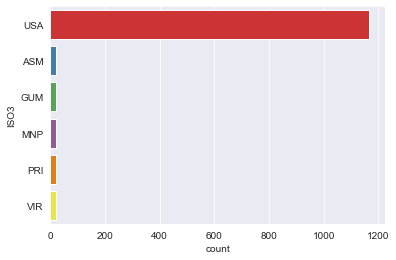

In [71]:
cat_summary(us_cov, y= 'ISO3')

Bivariate Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

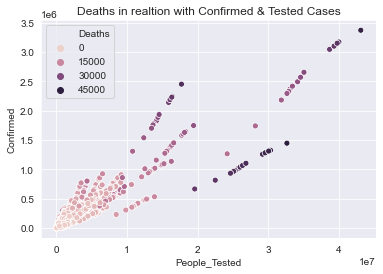

In [60]:
sns.scatterplot(x='People_Tested',y='Confirmed', hue = 'Deaths', data = us_cov)
plt.title('Deaths in realtion with Confirmed & Tested Cases')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

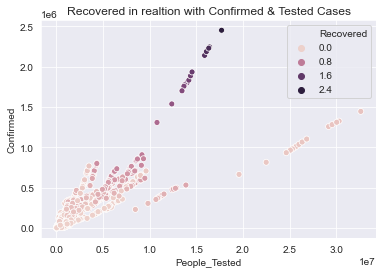

In [62]:
sns.scatterplot(x='People_Tested',y='Confirmed', hue = 'Recovered', data = us_cov)
plt.title('Recovered in realtion with Confirmed & Tested Cases')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

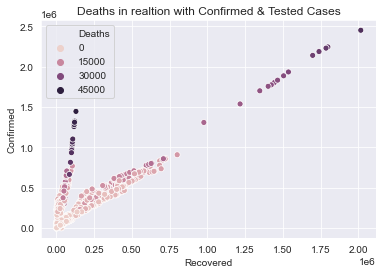

In [63]:
sns.scatterplot(x='Recovered',y='Confirmed', hue = 'Deaths', data = us_cov)
plt.title('Deaths in realtion with Confirmed & Tested Cases')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

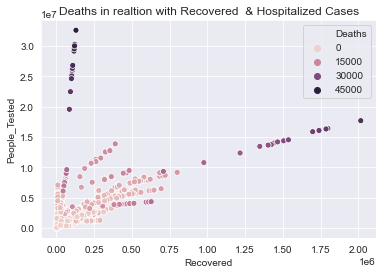

In [64]:
sns.scatterplot(x='Recovered',y='People_Tested', hue = 'Deaths', data = us_cov)
plt.title('Deaths in realtion with Recovered  & Hospitalized Cases')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

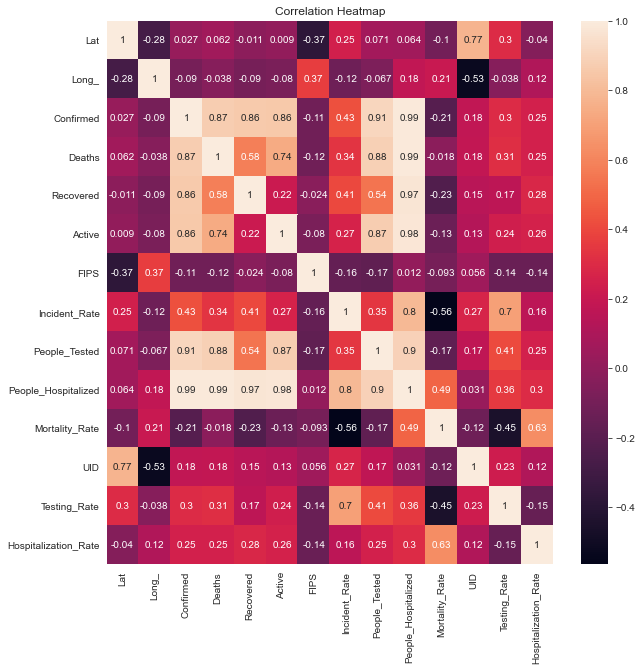

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(us_cov.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

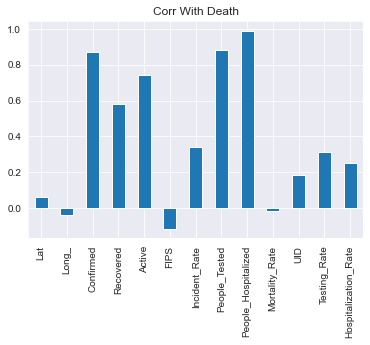

In [67]:
us_cov.drop('Deaths',axis=1).corrwith(us_cov['Deaths']).plot(kind = 'bar')
plt.title('Corr With Death')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

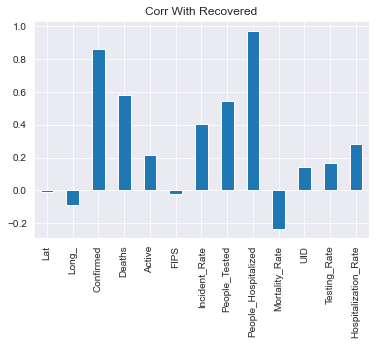

In [68]:
us_cov.drop('Recovered',axis=1).corrwith(us_cov['Recovered']).plot(kind = 'bar')
plt.title('Corr With Recovered')
plt.show()

# Data Cleaning & Preparation

In [93]:
# Format Changes
us_cov['Last_Update'] = pd.to_datetime(us_cov['Last_Update'], infer_datetime_format = True) # Convert DOB column in datestamp format
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
us_cov['Province_State']= le.fit_transform(us_cov['Province_State'].astype(str))
us_cov['ISO3']= le.fit_transform(us_cov['ISO3'].astype(str))
us_cov['Last_Update']= le.fit_transform(us_cov['Last_Update'])

<IPython.core.display.Javascript object>

In [94]:
#Droping identified columns & Than droping Nan values
us_cov.drop(['Country_Region','Lat', 'Long_','People_Hospitalized','Hospitalization_Rate'], axis = 1, inplace =True)
us_cov.dropna(inplace =True)

In [95]:
us_cov.shape

(995, 13)

In [98]:
# To calculate Z score & removing outliers
from scipy.stats import zscore
z = np.abs(zscore(us_cov))
threshold = 3
print(np.where(z<3))
print(us_cov.shape)
new_us_cov= us_cov[(z<3).all(axis=1)]
print(new_us_cov.shape)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([  0,   0,   0, ..., 994, 994, 994], dtype=int64), array([ 0,  1,  2, ..., 10, 11, 12], dtype=int64))
(995, 13)
(856, 13)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

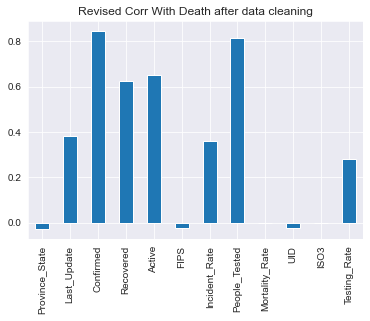

In [99]:
new_us_cov.drop('Deaths',axis=1).corrwith(new_us_cov['Deaths']).plot(kind = 'bar')
plt.title('Revised Corr With Death after data cleaning')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

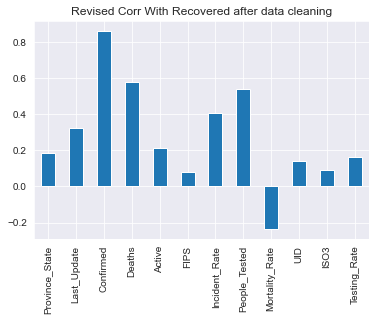

In [100]:
us_cov.drop('Recovered',axis=1).corrwith(us_cov['Recovered']).plot(kind = 'bar')
plt.title('Revised Corr With Recovered after data cleaning')
plt.show()

# Building Model

In [112]:
#Importing required libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [108]:
x = pd.DataFrame(new_us_cov.drop(['Deaths','Province_State','FIPS','UID','ISO3'], axis=1))
y = pd.DataFrame(new_us_cov['Deaths'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [109]:
x1 = new_us_cov.drop(['Recovered'], axis=1)
y1 = pd.DataFrame(new_us_cov['Recovered'])

<IPython.core.display.Javascript object>

# Building model for death rate Prediction

In [110]:
# identifying best random state
best_random_state = 0
accu = 0
for i in range(30,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.22, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    predlr = lr.predict(x_test)
    r2s = r2_score(y_test,predlr)
    if r2s > accu:
        accu = r2s
        best_random_state = i
        
        
print(f'The best random state is {best_random_state} with accuracy is {accu *100}%')

The best random state is 64 with accuracy is 92.4114544816606%


In [113]:
#Identifying best Algorithm
import warnings
warnings.filterwarnings('ignore')
models=[LinearRegression(),Lasso(alpha =0.001),Ridge(alpha =0.001), 
      ElasticNet(alpha =0.001), RandomForestRegressor(),
      AdaBoostRegressor(), DecisionTreeRegressor(), XGBRegressor(), GradientBoostingRegressor()]
for m in models:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.22, random_state = 64)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    cv_score = cross_val_score(m,x,y,cv= 10).mean()
    print(f'For algorithm {m} R2 Score is {r2_score(y_test,pred)*100}')
    print(f'For algorithm {m} mean Sqr Error is {mean_squared_error(y_test,pred)*100}')
    print(f'For algorithm {m} mean abs. error is {mean_absolute_error(y_test,pred)*100}')
    print(f'For algorithm {m} cross validation score is {cv_score*100}')
    print(f'Difference between r2 score & cv score = {(r2_score(y_test,pred)*100)-(cv_score*100)}\n')
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

For algorithm LinearRegression() R2 Score is 92.4114544816606
For algorithm LinearRegression() mean Sqr Error is 149243306.8463677
For algorithm LinearRegression() mean abs. error is 88347.85412306704
For algorithm LinearRegression() cross validation score is 83.16089053385956
Difference between r2 score & cv score = 9.25056394780104

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
For algorithm Lasso(alpha=0.001) R2 Score is 91.87555991454651
For algorithm Lasso(alpha=0.001) mean Sqr Error is 159782701.66502187
For algorithm Lasso(alpha=0.001) mean abs. error is 95304.01148366896
For algorithm Lasso(alpha=0.001) cross validation score is 80.55863869498475
Difference between r2 score & cv score = 11.316921219561763

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
For algorithm Ridge(alpha=0.001) R2 Score is 92.41145472881358
For algorithm Ridge(alpha=0.001) mean Sqr Error is 149243301.98563012
F

In [114]:
from sklearn.model_selection import GridSearchCV
xgb1 = RandomForestRegressor()
parameters = {'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}
xgb_grid = GridSearchCV(xgb1,parameters)

xgb_grid.fit(x_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.9693868897822929
{'criterion': 'mse', 'max_features': 'auto'}


In [116]:
# Building Regression model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.22, random_state = 64)
rfr = RandomForestRegressor(criterion= 'mse', max_features= 'auto')
rfr.fit(x_train,y_train)
predxgb = rfr.predict(x_test)
r2s = r2_score(y_test,predxgb)
mbe = mean_absolute_error(y_test,predxgb)
mse = mean_squared_error(y_test,predxgb)
cv_score = cross_val_score(xgb,x,y,cv= 10).mean()
print(f'R2 score is {(r2s*100)}%')
print(f'Mean absolute error is {(mbe)}')
print(f'Mean squared error is {(mse)}')
print(f'For algorithm {m} cross validation score is {cv_score*100}')
print(f'Difference between r2 score & cv score = {(r2s*100)-(cv_score*100)}\n')

R2 score is 99.03016451780076%
Mean absolute error is 177.66714285714286
Mean squared error is 190736.75463968256
For algorithm GradientBoostingRegressor() cross validation score is 95.45949046825608
Difference between r2 score & cv score = 3.570674049544678



# Developing Model for Recovery Prediction

In [117]:
# identifying best random state
best_random_state = 0
accu = 0
for i in range(30,100):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size =0.22, random_state = i)
    lr = LinearRegression()
    lr.fit(x1_train,y1_train)
    predlr = lr.predict(x1_test)
    r2s = r2_score(y1_test,predlr)
    if r2s > accu:
        accu = r2s
        best_random_state = i
        
        
print(f'The best random state is {best_random_state} with accuracy is {accu *100}%')

The best random state is 35 with accuracy is 99.98256985381782%


In [122]:
#Identifying best Algorithm
models=[LinearRegression(),Lasso(alpha =0.001),Ridge(alpha =0.001), 
      ElasticNet(alpha =0.001), RandomForestRegressor(),
      AdaBoostRegressor(), DecisionTreeRegressor(), XGBRegressor(),GradientBoostingRegressor()]
for m in models:
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size =0.22, random_state = 35)
    m.fit(x1_train,y1_train)
    pred = m.predict(x1_test)
    cv_score = cross_val_score(m,x1,y1,cv= 10).mean()
    print(f'For algorithm {m} R2 Score is {r2_score(y1_test,pred)*100}')
    print(f'For algorithm {m} mean Sqr Error is {mean_squared_error(y1_test,pred)*100}')
    print(f'For algorithm {m} mean abs. error is {mean_absolute_error(y1_test,pred)*100}')
    print(f'For algorithm {m} cross validation score is {cv_score*100}')
    print(f'Difference between r2 score & cv score = {(r2_score(y1_test,pred)*100)-(cv_score*100)}\n')
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

For algorithm LinearRegression() R2 Score is 99.98256985381782
For algorithm LinearRegression() mean Sqr Error is 514190791.06703913
For algorithm LinearRegression() mean abs. error is 162766.11431464946
For algorithm LinearRegression() cross validation score is 97.3219148499102
Difference between r2 score & cv score = 2.660655003907621

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
For algorithm Lasso(alpha=0.001) R2 Score is 99.98237475617451
For algorithm Lasso(alpha=0.001) mean Sqr Error is 519946188.0961205
For algorithm Lasso(alpha=0.001) mean abs. error is 165756.6969112823
For algorithm Lasso(alpha=0.001) cross validation score is 97.18081983131297
Difference between r2 score & cv score = 2.8015549248615343

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
For algorithm Ridge(alpha=0.001) R2 Score is 99.98256986000715
For algorithm Ridge(alpha=0.001) mean Sqr Error is 514190608.4818477


In [123]:
parameters = {'alpha':[1,0.1,0.01,0.001], 'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rdg = Ridge()
xgb_grid = GridSearchCV(rdg,parameters)
xgb_grid.fit(x1_train,y1_train)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.998748180152026
{'alpha': 1, 'solver': 'svd'}


In [245]:
# Building Regression model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.22, random_state = 42)
rdg_r = Ridge(alpha= 1, solver= 'svd')
rdg_r.fit(x1_train,y1_train)
predxgb_r = rdg_r.predict(x1_test)
r2s = r2_score(y1_test,predxgb_r)
mbe = mean_absolute_error(y1_test,predxgb_r)
mse = mean_squared_error(y_test,predxgb_r)
cv_score = cross_val_score(rdg_r,x1,y1,cv= 10).mean()
print(f'R2 score is {(r2s*100)}%')
print(f'Mean absolute error is {(mbe)}')
print(f'Mean squared error is {(mse)}')
print(f'For algorithm {m} cross validation score is {cv_score*100}')
print(f'Difference between r2 score & cv score = {(r2s*100)-(cv_score*100)}\n')

R2 score is 99.9825759840481%
Mean absolute error is 1626.4429919934146
Mean squared error is 45081606628.79679
For algorithm GradientBoostingRegressor() cross validation score is 97.32433378551475
Difference between r2 score & cv score = 2.658242198533344



# Testing the models

In [246]:
y_r_pre = rdg_r.predict(x1)
y_d_pre = rfr.predict(x)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

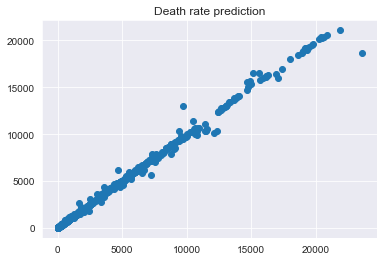

In [251]:
plt.scatter(y,y_d_pre)
plt.title('Death rate prediction')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

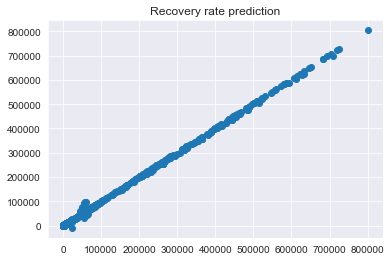

In [252]:
plt.scatter(y1,y_r_pre)
plt.title('Recovery rate prediction')
plt.show()

# Saving the best Models

In [207]:
import joblib
joblib.dump(rfr,'Cov_19 Death Prediction.obj')

['Cov_19 Death Prediction.obj']

In [249]:
import joblib
joblib.dump(rdg_r,'Cov_19 Recovery Prediction.obj')

['Cov_19 Recovery Prediction.obj']

In [209]:
de_p = joblib.load('Cov_19 Death Prediction.obj')

In [250]:
re_p = joblib.load('Cov_19 Recovery Prediction.obj')

# Testing the model